<h2 style="color:darkred;font-size:30px">Projet 3 : Anticipez les besoins en consommation électrique de bâtiments</h2>

<img src="images\seattle.png" alt="Drawing" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 3 : Features Engineering</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Sommaire</h2>

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# seaborn settings
# plt.style.use("seaborn-whitegrid") 

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# quelques arrangement sur jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30,
        }

In [3]:
# lire le fichier csv 
data = pd.read_csv('data/building-energy-benchmarking_data.csv')
print('Le jeu des données data compte {} colonnes et {} lignes.'.format(data.shape[1]
                                                                        , data.shape[0]))

Le jeu des données data compte 26 colonnes et 1686 lignes.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1686 non-null   int64  
 1   BuildingType                     1686 non-null   object 
 2   PrimaryPropertyType              1686 non-null   object 
 3   PropertyName                     1686 non-null   object 
 4   CouncilDistrictCode              1686 non-null   object 
 5   Neighborhood                     1686 non-null   object 
 6   NumberofBuildings                1686 non-null   int64  
 7   NumberofFloors                   1686 non-null   int64  
 8   PropertyGFATotal                 1686 non-null   int64  
 9   PropertyGFAParking               1686 non-null   int64  
 10  PropertyGFABuilding(s)           1686 non-null   int64  
 11  ListOfAllPropertyUseTypes        1673 non-null   object 
 12  LargestPropertyUseTy

In [5]:
data[(data['NumberofBuildings'] > 10)].sort_values(by=['NumberofBuildings'], ascending=False)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ZipCode,BuildingAge
102,172,Campus,University,SSCC MAIN CAMPUS,a,Delridge,27,2,441071,0,441071,College/University,College/University,483000,NaN,0,NaN,0,NaN,38301744,0,25314575,12987166,866,98106,51
1112,23622,Campus,Other,FT C15 Fishermen's Center,g,Magnolia / queen anne,23,1,260241,0,260241,Other,Other,260241,NaN,0,NaN,0,NaN,34012980,0,26894616,7118362,566,98119,66
158,261,Campus,Large Office,South Park,a,Greater duwamish,14,2,334368,31874,302494,"Laboratory, Non-Refrigerated Warehouse, Office...",Office,240984,Laboratory,72963,Other - Utility,16766,NaN,53466684,0,45321378,8145300,749,98108,41
1337,25251,Campus,University,5th Avenue Master Meter,g,Magnolia / queen anne,14,2,537000,0,537000,College/University,College/University,533826,NaN,0,NaN,0,NaN,90609640,0,22619097,67990538,3769,98119,76
124,211,Campus,University,NSCC MAIN CAMPUS,e,Northwest,11,2,694072,111625,582447,College/University,College/University,667335,NaN,0,NaN,0,NaN,35891484,0,33450832,2440648,363,98103,51


In [6]:
data = data[data['NumberofBuildings'] < 11].copy()

In [7]:
data[(data['NumberofBuildings'] > 4) & (data['BuildingType'] == 'Campus')].shape

(5, 26)

In [8]:
data[(data['NumberofBuildings'] > 4)].shape

(17, 26)

In [9]:
data.shape[0]

1681

In [10]:
data[data['BuildingType'] == 'Campus'].sort_values(by=['NumberofBuildings'], ascending=False)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ZipCode,BuildingAge
1178,24086,Campus,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,b,Greater duwamish,10,0,230971,0,230971,"Other, Parking",Other,230970,Parking,0,NaN,0,NaN,21022288,0,15419770,5602515,405,98134,30
1633,49859,Campus,Other,AMGEN INC. MASTER CAMPUS,g,Magnolia / queen anne,7,4,808520,376000,432520,Other,Other,808520,NaN,0,NaN,0,NaN,157606480,0,76742000,80867644,4830,98119,19
1075,23117,Campus,Other,Joint Training Facilities Campus,a,Delridge,5,1,57952,0,57952,Adult Education,Adult Education,57952,NaN,0,NaN,0,NaN,3091388,0,1474450,1616937,96,98108,16
1084,23265,Campus,Other,T102 1011 B/C,a,Greater duwamish,5,2,138907,0,138907,Other,Other,139557,NaN,0,NaN,0,NaN,7837692,0,5130303,2707389,180,98134,32
740,20325,Campus,K-12 School,University Prep Academy,d,Northeast,5,3,21500,0,21500,K-12 School,K-12 School,96154,NaN,0,NaN,0,44.0,6689184,0,3307692,3381491,203,98115,32
186,315,Campus,Other,P66 Bell Harbor International Conference Cente...,g,Downtown,4,3,215476,0,215476,Other,Other,217088,NaN,0,NaN,0,NaN,24017770,0,13788853,10228916,639,98125,26
1638,49909,Campus,University,SSCC DUWAMISH GEORGETOWN CAMPUS,b,Greater duwamish,4,2,149856,0,149856,College/University,College/University,149856,NaN,0,NaN,0,NaN,6335316,0,4967236,1368079,107,98108,14
644,19491,Campus,Other,Pacific Multiforms Inc- Campus,b,Greater duwamish,3,1,22800,0,22800,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,22800,NaN,0,NaN,0,NaN,2222098,0,358020,1864077,102,98155,27
295,432,Campus,Mixed Use Property,Securities Building Campus,g,Downtown,3,10,258497,0,258497,"Data Center, Office, Parking, Restaurant, Reta...",Parking,155000,Office,145594,Retail Store,103200,NaN,20779796,3902781,16877013,0,419,98101,108
922,21481,Campus,Low-Rise Multifamily,Sanitary Market,g,Downtown,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669,Retail Store,10455,Restaurant,3668,NaN,3778355,0,3778355,0,26,98101,79


In [11]:
data[data['BuildingType'] == 'Campus'].shape

(18, 26)

In [12]:
# data = data[data['BuildingType'] != 'Campus'].copy()

In [13]:
# data = data[~((data['NumberofBuildings'] > 4) & (data['BuildingType'] == 'Campus'))].copy()

In [14]:
data.shape

(1681, 26)

# 6. Features Engineering

Nous allons transformer les données brutes en caractéristiques représentant plus précisément le problème sous-jacent au modèle prédictif.

## 6.1 Création des nouveaux features 1 (check)

In [15]:
data['SteamUse_check'] = (data['SteamUse(kBtu)'] >= 0) & (data['SteamUse(kBtu)'] == 0)
data['Electricity_check'] = (data['Electricity(kBtu)'] >= 0) & (data['Electricity(kBtu)'] == 0)
data['NaturalGas_check'] = (data['NaturalGas(kBtu)'] >= 0) & (data['NaturalGas(kBtu)'] == 0)

In [16]:
data['SteamUse_check'].replace({False: 1, True: 0}, inplace=True)
data['Electricity_check'].replace({False: 1, True: 0}, inplace=True)
data['NaturalGas_check'].replace({False: 1, True: 0}, inplace=True)

## 6.2 Création des nouveaux features 2 (à partir de LargestPropertyUseType)

In [17]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', nan, 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [18]:
lp = pd.get_dummies(data['LargestPropertyUseType'])

lp

,Adult Education,Automobile Dealership,Bank Branch,College/University,Convention Center,Courthouse,Data Center,Distribution Center,Financial Office,Fire Station,Fitness Center/Health Club/Gym,Food Service,Hospital (General Medical & Surgical),Hotel,K-12 School,Laboratory,Library,Lifestyle Center,Manufacturing/Industrial Plant,Medical Office,Movie Theater,Multifamily Housing,Museum,Non-Refrigerated Warehouse,Office,Other,Other - Education,Other - Entertainment/Public Assembly,Other - Lodging/Residential,Other - Mall,Other - Public Services,Other - Recreation,Other - Restaurant/Bar,Other - Services,Other - Utility,Other/Specialty Hospital,Outpatient Rehabilitation/Physical Therapy,Parking,Performing Arts,"Personal Services (Health/Beauty, Dry Cleaning, etc)",Police Station,Pre-school/Daycare,Prison/Incarceration,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Residence Hall/Dormitory,Residential Care Facility,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Urgent Care/Clinic/Other Outpatient,Wholesale Club/Supercenter,Worship Facility
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
lp.columns = lp.columns.str.replace(" ", "")
lp.columns = lp.columns.str.replace("/", "")
lp.columns = lp.columns.str.replace("-", "")
lp.columns = lp.columns.str.replace("(", "")
lp.columns = lp.columns.str.replace(")", "")
lp.columns = lp.columns.str.replace(",", "")
lp.columns = lp.columns.str.replace("&", "")

<ipython-input-19-54efe925cf6c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lp.columns = lp.columns.str.replace("(", "")
<ipython-input-19-54efe925cf6c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lp.columns = lp.columns.str.replace(")", "")


In [20]:
lp.columns

Index(['AdultEducation', 'AutomobileDealership', 'BankBranch',
       'CollegeUniversity', 'ConventionCenter', 'Courthouse', 'DataCenter',
       'DistributionCenter', 'FinancialOffice', 'FireStation',
       'FitnessCenterHealthClubGym', 'FoodService',
       'HospitalGeneralMedicalSurgical', 'Hotel', 'K12School', 'Laboratory',
       'Library', 'LifestyleCenter', 'ManufacturingIndustrialPlant',
       'MedicalOffice', 'MovieTheater', 'MultifamilyHousing', 'Museum',
       'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation',
       'OtherEntertainmentPublicAssembly', 'OtherLodgingResidential',
       'OtherMall', 'OtherPublicServices', 'OtherRecreation',
       'OtherRestaurantBar', 'OtherServices', 'OtherUtility',
       'OtherSpecialtyHospital', 'OutpatientRehabilitationPhysicalTherapy',
       'Parking', 'PerformingArts',
       'PersonalServicesHealthBeautyDryCleaningetc', 'PoliceStation',
       'PreschoolDaycare', 'PrisonIncarceration', 'RefrigeratedWarehouse',
     

In [21]:
data = pd.concat([data, lp], axis=1)

In [22]:
LargestPropertyUseType = data['LargestPropertyUseType'].value_counts().head(57).to_frame()
LargestPropertyUseType.style.background_gradient(cmap='Reds')

,LargestPropertyUseType
Office,500
Non-Refrigerated Warehouse,200
K-12 School,131
Retail Store,100
Other,100
Hotel,76
Worship Facility,71
Distribution Center,54
Medical Office,44
Supermarket/Grocery Store,41


In [23]:
list1 = [
    #'BuildingAge',
    'NumberofBuildings',
    #'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding',
    'PropertyGFAParking',
    'ZipCode',
    # ----
    'SteamUse_check',
    'Electricity_check',
    'NaturalGas_check',
    # ----
    'AdultEducation', 'AutomobileDealership', 'BankBranch',
       'CollegeUniversity', 'ConventionCenter', 'Courthouse', 'DataCenter',
       'DistributionCenter', 'FinancialOffice', 'FireStation',
       'FitnessCenterHealthClubGym', 'FoodService',
       'HospitalGeneralMedicalSurgical', 'Hotel', 'K12School', 'Laboratory',
       'Library', 'LifestyleCenter', 'ManufacturingIndustrialPlant',
       'MedicalOffice', 'MovieTheater', 'MultifamilyHousing', 'Museum',
       'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation',
       'OtherEntertainmentPublicAssembly', 'OtherLodgingResidential',
       'OtherMall', 'OtherPublicServices', 'OtherRecreation',
       'OtherRestaurantBar', 'OtherServices', 'OtherUtility',
       'OtherSpecialtyHospital', 'OutpatientRehabilitationPhysicalTherapy',
       'Parking', 'PerformingArts',
       'PersonalServicesHealthBeautyDryCleaningetc', 'PoliceStation',
       'PreschoolDaycare', 'PrisonIncarceration', 'RefrigeratedWarehouse',
       'RepairServicesVehicleShoeLocksmithetc', 'ResidenceHallDormitory',
       'ResidentialCareFacility', 'Restaurant', 'RetailStore',
       'SelfStorageFacility', 'SeniorCareCommunity', 'SocialMeetingHall',
       'StripMall', 'SupermarketGroceryStore',
       'UrgentCareClinicOtherOutpatient', 'WholesaleClubSupercenter',
       'WorshipFacility'
]

new1 = "+".join(list1)
new1

'NumberofBuildings+PropertyGFATotal+PropertyGFABuilding+PropertyGFAParking+ZipCode+SteamUse_check+Electricity_check+NaturalGas_check+AdultEducation+AutomobileDealership+BankBranch+CollegeUniversity+ConventionCenter+Courthouse+DataCenter+DistributionCenter+FinancialOffice+FireStation+FitnessCenterHealthClubGym+FoodService+HospitalGeneralMedicalSurgical+Hotel+K12School+Laboratory+Library+LifestyleCenter+ManufacturingIndustrialPlant+MedicalOffice+MovieTheater+MultifamilyHousing+Museum+NonRefrigeratedWarehouse+Office+Other+OtherEducation+OtherEntertainmentPublicAssembly+OtherLodgingResidential+OtherMall+OtherPublicServices+OtherRecreation+OtherRestaurantBar+OtherServices+OtherUtility+OtherSpecialtyHospital+OutpatientRehabilitationPhysicalTherapy+Parking+PerformingArts+PersonalServicesHealthBeautyDryCleaningetc+PoliceStation+PreschoolDaycare+PrisonIncarceration+RefrigeratedWarehouse+RepairServicesVehicleShoeLocksmithetc+ResidenceHallDormitory+ResidentialCareFacility+Restaurant+RetailStore+S

In [24]:
anova_variete_check = smf.ols('SiteEnergyUse~'+new1, data=data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'PropertyGFABuilding(s)':'PropertyGFABuilding'})).fit()
print(anova_variete_check.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     67.17
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:58:02   Log-Likelihood:                -29455.
No. Observations:                1681   AIC:                         5.904e+04
Df Residuals:                    1616   BIC:                         5.939e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [25]:
list2 = [
    #'BuildingAge',
    'NumberofBuildings',
    #'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding',
    'PropertyGFAParking',
    'ZipCode',
    # ----
    'SteamUse_check',
    'Electricity_check',
    'NaturalGas_check',
    # ----
    'DataCenter',
    'HospitalGeneralMedicalSurgical',
    'Laboratory',
    'MedicalOffice',
    'Other',
    'Parking',
    'SupermarketGroceryStore',
    'UrgentCareClinicOtherOutpatient',
    # ----
    'Office',
    'NonRefrigeratedWarehouse',
    'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',
    'Courthouse'
    
]

new2 = "+".join(list2)
new2

'NumberofBuildings+PropertyGFATotal+PropertyGFABuilding+PropertyGFAParking+ZipCode+SteamUse_check+Electricity_check+NaturalGas_check+DataCenter+HospitalGeneralMedicalSurgical+Laboratory+MedicalOffice+Other+Parking+SupermarketGroceryStore+UrgentCareClinicOtherOutpatient+Office+NonRefrigeratedWarehouse+K12School+Hotel+RetailStore+DistributionCenter+OtherEducation+Courthouse'

In [26]:
anova_variete_check = smf.ols('SiteEnergyUse~'+new2, data=data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'PropertyGFABuilding(s)':'PropertyGFABuilding'})).fit()
print(anova_variete_check.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:58:02   Log-Likelihood:                -29465.
No. Observations:                1681   AIC:                         5.898e+04
Df Residuals:                    1657   BIC:                         5.911e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [27]:
data.drop(lp.columns.difference([
    'HospitalGeneralMedicalSurgical',
    'MedicalOffice',
    'Other',
    'SupermarketGroceryStore',
    'Office',
    'NonRefrigeratedWarehouse',
    'Hotel',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation'
]),
        1,
        inplace=True)

In [28]:
# removed

#nbd = pd.get_dummies(data['Neighborhood'])
#nbd

#nbd.drop(nbd.columns.difference(['East']), 1, inplace=True)

In [29]:
#nbd.columns

In [30]:
#data = pd.concat([data, nbd], axis=1)

## 6.3 Création des nouveaux features 2 (à partir de GFA)

In [31]:
data['LP_Ratio'] = round(100 * data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['LP_Ratio'] = data['LP_Ratio'].astype('int64')

data['SLP_Ratio'] = round(100 * data['SecondLargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['SLP_Ratio'] = data['SLP_Ratio'].astype('int64')

data['TLP_Ratio'] = round(100 * data['ThirdLargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['TLP_Ratio'] = data['TLP_Ratio'].astype('int64')

In [32]:
data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ZipCode,BuildingAge,SteamUse_check,Electricity_check,NaturalGas_check,DistributionCenter,HospitalGeneralMedicalSurgical,Hotel,MedicalOffice,NonRefrigeratedWarehouse,Office,Other,OtherEducation,RetailStore,SupermarketGroceryStore,LP_Ratio,SLP_Ratio,TLP_Ratio
0,1,NonResidential,Hotel,Mayflower park hotel,g,Downtown,1,12,88434,0,88434,Hotel,Hotel,88434,NaN,0,NaN,0,60.0,7226362,2003882,3946027,1276453,250,98101,94,1,1,1,0,0,1,0,0,0,0,0,0,0,100,0,0
1,2,NonResidential,Hotel,Paramount Hotel,g,Downtown,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880,Parking,15064,Restaurant,4622,61.0,8387933,0,3242851,5145082,296,98101,25,0,1,1,0,0,1,0,0,0,0,0,0,0,81,15,4
2,3,NonResidential,Hotel,5673-The Westin Seattle,g,Downtown,1,41,956110,196718,759392,Hotel,Hotel,756493,NaN,0,NaN,0,43.0,72587024,21566554,49526664,1493800,2089,98101,52,1,1,1,0,0,1,0,0,0,0,0,0,0,79,0,0
3,5,NonResidential,Hotel,HOTEL MAX,g,Downtown,1,10,61320,0,61320,Hotel,Hotel,61320,NaN,0,NaN,0,56.0,6794584,2214446,2768924,1811213,286,98101,95,1,1,1,0,0,1,0,0,0,0,0,0,0,100,0,0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),g,Downtown,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,Parking,68009,Swimming Pool,0,75.0,14172606,0,5368607,8803998,505,98121,41,0,1,1,0,0,1,0,0,0,0,0,0,0,70,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,50221,Nonresidential COS,Other,High Point Community Center,a,Delridge,1,1,18261,0,18261,Other - Recreation,Other - Recreation,18261,NaN,0,NaN,0,NaN,932082,0,632362,299720,20,98100,39,0,1,1,0,0,0,0,0,0,0,0,0,0,100,0,0
1682,50223,Nonresidential COS,Other,International district/Chinatown CC,b,Downtown,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000,NaN,0,NaN,0,NaN,950276,0,396546,553730,32,98100,17,0,1,1,0,0,0,0,0,0,0,0,0,0,100,0,0
1683,50224,Nonresidential COS,Other,Queen Anne Pool,g,Magnolia / queen anne,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583,Fitness Center/Health Club/Gym,5574,Swimming Pool,0,NaN,5765898,0,1792159,3973739,224,98100,47,0,1,1,0,0,0,0,0,0,0,0,0,0,58,42,0
1684,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,a,Greater duwamish,1,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601,Fitness Center/Health Club/Gym,6501,Pre-school/Daycare,484,NaN,719471,0,348870,370601,22,98100,32,0,1,1,0,0,0,0,0,0,0,0,0,0,47,46,3


# 7. Le premier pas vers la modélisation : la baseline

In [33]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    ##'BuildingType',
    'PrimaryPropertyType',
    ##'Neighborhood',
    #'LargestPropertyUseType',
    #'LP_category',
]

features_num = [
    # ----
    #'BuildingAge',
    'NumberofBuildings',
    ##'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    #'PropertyGFAParking',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    'ZipCode',
    
    # ----
    
    #'DataCenter',
    'HospitalGeneralMedicalSurgical',
    #'Laboratory',
    'MedicalOffice',
    'Other',
    #'Parking',
    'SupermarketGroceryStore',
    #'UrgentCareClinicOtherOutpatient',
    
    # ----
    
    'Office',
    'NonRefrigeratedWarehouse',
    #'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',


    
    
    # ----
    
    'SteamUse_check',
    #'Electricity_check',
    'NaturalGas_check',
    
    # ----
    
    #'LP_Ratio_Other',
    #'LP_Ratio_Hospital',
    #'LP_Ratio_UrgentCare',
    #'LP_Ratio_NonRefrigeratedWarehouse',
    #'LP_Ratio_K12School',
    #'LP_Ratio_RetailStore',
    #'LP_Ratio_Office',
    #'LP_Ratio_Hotel',
    #'LP_Ratio_WorshipFacility',
    #'LP_Ratio_MedicalOffice',
    #'LP_Ratio_Laboratory',
    # ----
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
]

features_high_corr = [
    'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)'
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1685
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1681 non-null   int64  
 1   BuildingType                     1681 non-null   object 
 2   PrimaryPropertyType              1681 non-null   object 
 3   PropertyName                     1681 non-null   object 
 4   CouncilDistrictCode              1681 non-null   object 
 5   Neighborhood                     1681 non-null   object 
 6   NumberofBuildings                1681 non-null   int64  
 7   NumberofFloors                   1681 non-null   int64  
 8   PropertyGFATotal                 1681 non-null   int64  
 9   PropertyGFAParking               1681 non-null   int64  
 10  PropertyGFABuilding(s)           1681 non-null   int64  
 11  ListOfAllPropertyUseTypes        1668 non-null   object 
 12  LargestPropertyUseTy

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score

#X = data[features_num]

X = data[['BuildingAge', 'NumberofFloors']]
y = data['SiteEnergyUse(kBtu)'].values

column_trans = make_column_transformer(
    (OneHotEncoder(), features_cat),  # encodage
    (StandardScaler(), features_num),  # standardisation
    #(StandardScaler(), features_high_corr),
    remainder='passthrough')

#X = column_trans.fit_transform(data[features_cat + features_num])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2,
    random_state=42)  # 20% des données dans le jeu de test

print(f"La taille de données d'entrainement : {X_train.shape[0]}")
print(f"La taille de données d'entrainement : {X_test.shape[0]}")

La taille de données d'entrainement : 1344
La taille de données d'entrainement : 337


In [61]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

standard_scaler = preprocessing.StandardScaler().fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [64]:
print("Le score R^2 de la performance du modèle baseline : {:.4f}".format(r2_score(y_test, y_pred_lr)))

Le score R^2 de la performance du modèle baseline : 0.1407


In [40]:
lin_reg.intercept_

7.156504732982285e+18

In [41]:
# plt.barh(['BuildingAge', 'PropertyGFATotal'], lin_reg.coef_)
# plt.show()

In [42]:
data_transformed = data[identity + features_cat + features_num + to_predict + energystar]

In [43]:
data_transformed.to_csv('data/building-energy-benchmarking_transformed.csv', index=False)

In [44]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1685
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1681 non-null   int64  
 1   PropertyName                     1681 non-null   object 
 2   PrimaryPropertyType              1681 non-null   object 
 3   NumberofBuildings                1681 non-null   int64  
 4   PropertyGFATotal                 1681 non-null   int64  
 5   PropertyGFABuilding(s)           1681 non-null   int64  
 6   LargestPropertyUseTypeGFA        1681 non-null   int64  
 7   SecondLargestPropertyUseTypeGFA  1681 non-null   int64  
 8   ZipCode                          1681 non-null   int64  
 9   HospitalGeneralMedicalSurgical   1681 non-null   uint8  
 10  MedicalOffice                    1681 non-null   uint8  
 11  Other                            1681 non-null   uint8  
 12  SupermarketGrocerySt

In [45]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
X = data[features_num]
calc_vif(X)

,variables,VIF
0,NumberofBuildings,4.681607
1,PropertyGFATotal,56.533898
2,PropertyGFABuilding(s),35.576723
3,LargestPropertyUseTypeGFA,26.133730
4,SecondLargestPropertyUseTypeGFA,4.773791
5,ZipCode,25.540653
6,HospitalGeneralMedicalSurgical,1.355011
7,MedicalOffice,1.123612
8,Other,1.210134
9,SupermarketGroceryStore,1.078734


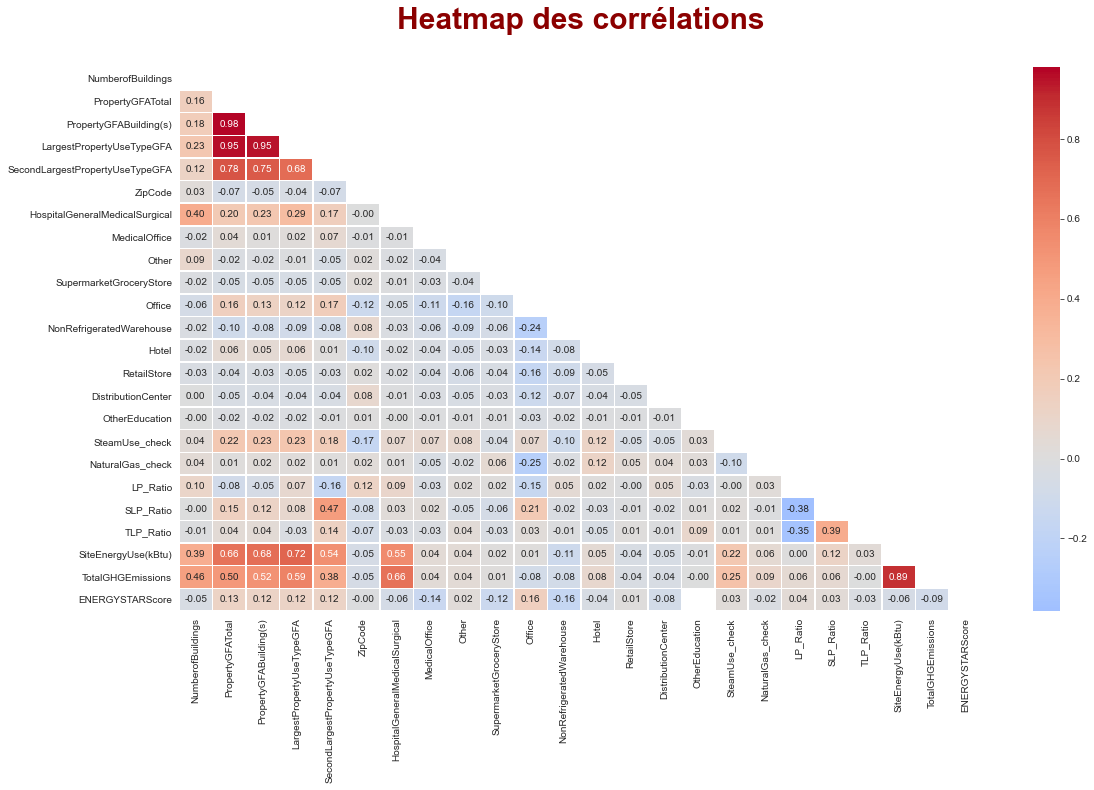

In [47]:
plt.subplots(figsize=(18, 10))
matrix = np.triu(data[features_num + to_predict + energystar].corr())

ax = sns.heatmap(data[features_num + to_predict + energystar].corr(),
                 annot=True,
                 fmt=".2f",
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.5
                )
ax.set_title(f'Heatmap des corrélations\n', fontdict=font)
plt.show()